<a href="https://colab.research.google.com/github/nasirbashak/Plant-the-future/blob/master/Traffic_Data_Creation_using_1D_Perlin_noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#!pip install tf-nightly-2.0-preview
!pip install tensorflow==2.1.0
!pip install noise


     |████████████████████████████████| 421.8MB 38kB/s 
     |████████████████████████████████| 450kB 43.4MB/s 
     |████████████████████████████████| 3.9MB 47.1MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


     |████████████████████████████████| 133kB 28.0MB/s 
  Created wheel for noise: filename=noise-1.2.2-cp36-cp36m-linux_x86_64.whl size=62459 sha256=6734d79f78bf96664b3a5790bb9412ef52e8bdd59bb8e22ea1aaf944513cfb5c
  Stored in directory: /root/.cache/pip/wheels/fd/a3/c1/d36defe6e9f074b25dc0f018eb9f8fdd675a7ef87071ce3821
Successfully built noise


### Importing Packages

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import noise
import pandas as pd

print(tf.__version__)

1.15.0


### Helper function to plot data

In [0]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(False)

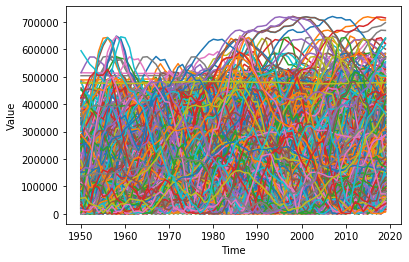

In [0]:
def createData(rows,startYear,endYear,plotGraph=True,printLog=True):

  points = 256
  span = 5.0
  octaves = 20
  base = 25
  slope = .005
  amplitude = 10000

  values = []
  n= 0


  while n != rows:
    if printLog:
      print("Row ",n+1)
    span = np.random.random_sample()*10

    time = []
    value = []

    for i in range(startYear,endYear+1):
      x = float(i) * span / points - 0.5 * span

      y = base + noise.pnoise1(x , octaves) * amplitude
      #print(x,y, end= '\n')
      time.append(int(i))
      value.append(int(np.abs(y)*100))
      base*=slope

    #print(len(value))
    if value[0] > value[-1]:
      if printLog:
        print("Rejected\n")
    else:
      if printLog:
        print("Accepted\n")
      n+=1
      if plotGraph:
        #plt.plot(time, value)
        plot_series(time,value)
        #print(time[0],time[-1])
        #print(value[0],value[-1])

      values.append(np.array(value))



  return np.array(values)

    
    #print(time)
    #print(value)

data = createData(1000,startYear=1950,endYear=2019,plotGraph=True,printLog=False)


In [0]:
data.shape

(1000, 70)

In [0]:
years = list(range(1950,2020))
years = list(map(str,years))
years[:20]

['1950',
 '1951',
 '1952',
 '1953',
 '1954',
 '1955',
 '1956',
 '1957',
 '1958',
 '1959',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969']

In [0]:
 d= pd.DataFrame(data,columns = years)
 d.head()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,150403,182655,208904,239936,259450,278091,299020,297100,286809,246121,205695,191284,176929,168412,150050,129941,96688,67916,56928,52585,58217,50858,59579,49217,28646,32376,52123,53698,55264,53876,52620,42978,33503,14361,41981,44583,41128,33388,37143,49098,62262,89940,129862,158811,193117,206279,195761,193889,197014,178351,177136,172524,175826,177172,187702,197876,188720,184930,176246,167307,184657,212086,249144,285684,299955,307400,281048,306884,285234,249815
1,76958,34511,10175,17840,3110,4809,22907,3940,28213,106054,188835,243715,265645,330122,410408,457375,457198,439433,380340,365049,359963,305433,282811,357516,411813,419873,462643,464720,332320,206955,104804,20150,159063,278800,377236,431964,408282,347630,357313,311203,269980,235530,259209,349292,409317,454281,503172,447574,346372,318914,300665,304878,264449,128261,52602,33358,45334,25578,34104,25991,61489,51700,55235,100951,78233,116064,181613,107099,124659,184114
2,31735,49601,35689,1721,36185,76196,90421,96130,67988,32638,4656,43026,52682,20355,5778,27165,76165,118544,145881,147872,161806,154259,149530,177686,196856,218599,243521,210525,157432,79936,5411,25700,34799,5572,60942,7184,31806,33101,16397,26848,4690,1941,62087,46397,2727,54982,66273,65864,881,62222,61557,28507,13990,19309,32462,23265,20430,4653,18021,7525,6288,17255,1213,535,38775,104211,86714,48103,398,41483
3,21750,1660,3071,1471,7587,9653,21953,15856,16401,14954,54558,90118,143887,137989,149867,158105,149317,151354,162720,177621,213969,252876,289905,272266,310265,313622,335361,352662,367286,396994,398262,409545,428093,446762,469919,468878,518675,545625,534823,508839,499924,490188,477452,452229,426874,384093,327397,285222,256686,229930,182209,131581,121284,134772,133356,123365,130122,111925,102477,80822,44795,22914,12666,10953,51031,67753,97752,113275,149623,137284
4,115679,138678,179910,282093,364453,379865,376419,382417,353360,326951,300109,241991,227385,136653,115719,38861,4173,9202,334,19166,75399,125420,129184,111092,44933,19474,99334,138748,160886,193011,138202,79669,44427,14639,14044,34016,5421,24103,45724,12400,36931,41936,8359,79861,102983,77201,97860,49274,76773,127261,130839,132539,140077,109508,40169,152676,183945,170523,155457,114129,68549,27033,30036,71258,131684,174191,232516,275704,326658,376725


In [0]:
d.to_csv("TrafficDensity1950to2019.csv")

In [0]:
d.describe()


,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,93816.827000,97444.770000,101803.490000,107464.027000,113701.402000,119658.943000,124090.359000,127898.429000,130136.104000,131404.570000,132375.171000,133877.293000,134629.539000,136844.961000,139500.651000,142591.000000,145393.297000,146558.591000,148195.397000,149436.296000,151069.708000,151290.655000,151573.081000,150678.633000,150742.468000,150720.432000,152826.092000,152828.573000,150449.845000,149549.360000,149378.713000,149890.9890,151130.981000,154287.147000,157716.678000,160108.616000,163677.436000,167257.773000,170533.831000,170566.499000,170319.082000,169663.08000,168786.217000,169122.76600,170008.56900,171701.606000,173057.913000,172894.387000,173112.059000,173248.208000,173363.069000,173406.691000,173244.782000,173754.329000,175324.75400,177885.798000,180160.22000,183345.927000,185736.780000,187601.653000,189761.109000,193678.061000,197460.606000,200082.29800,204159.60000,208803.460000,212369.374000,217430.00400,223319.472000,226963.796000
std,102142.004021,102388.957204,106351.130359,111135.752941,115525.900353,120188.753441,124175.305922,127259.796744,127209.477907,126762.392856,127112.719575,125878.903357,126652.191474,126312.344799,126697.060397,127616.882965,128612.731427,129464.573098,129327.196085,129173.618647,127851.196246,126828.309326,128001.505959,128725.353895,129343.638102,132301.378934,134745.570103,135308.286843,134991.247453,134900.337887,136350.451368,137859.2556,140815.249594,142826.442675,145830.003315,148485.004426,150052.164146,150137.035623,150668.245857,149875.450363,148190.607553,146461.19241,146585.030045,146517.59074,147520.48765,148009.881983,149132.959176,150862.207687,151290.407185,150263.510163,149745.135536,148572.722707,149500.071572,150441.597637,152205.66386,153614.089685,153743.46359,154393.906033,155358.485486,155741.386354,155400.529583,154315.305312,152813.769813,151852.98705,150360.37927,149018.786954,148343.949678,147446.11074,146173.615799,143733.395338
min,190.000000,68.000000,111.000000,437.000000,315.000000,77.000000,26.000000,20.000000,99.000000,96.000000,70.000000,69.000000,390.000000,38.000000,275.000000,177.000000,101.000000,78.000000,159.000000,213.000000,169.000000,320.000000,5.000000,25.000000,343.000000,283.000000,311.000000,53.000000,36.000000,385.000000,40.000000,18.0000,190.000000,124.000000,49.000000,0.000000,71.000000,385.000000,422.000000,223.000000,160.000000,59.00000,21.000000,48.00000,287.00000,159.000000,198.000000,289.000000,66.000000,500.000000,30.000000,39.000000,62.000000,263.000000,77.00000,25.000000,79.00000,163.000000,3.000000,65.000000,124.000000,1261.000000,452.000000,293.00000,283.00000,359.000000,288.000000,698.00000,353.000000,7711.000000
25%,23206.500000,25967.250000,27526.500000,27961.750000,27386.000000,30708.000000,32545.000000,31549.750000,35102.500000,34847.250000,

In [0]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 70 columns):
1950    1000 non-null int64
1951    1000 non-null int64
1952    1000 non-null int64
1953    1000 non-null int64
1954    1000 non-null int64
1955    1000 non-null int64
1956    1000 non-null int64
1957    1000 non-null int64
1958    1000 non-null int64
1959    1000 non-null int64
1960    1000 non-null int64
1961    1000 non-null int64
1962    1000 non-null int64
1963    1000 non-null int64
1964    1000 non-null int64
1965    1000 non-null int64
1966    1000 non-null int64
1967    1000 non-null int64
1968    1000 non-null int64
1969    1000 non-null int64
1970    1000 non-null int64
1971    1000 non-null int64
1972    1000 non-null int64
1973    1000 non-null int64
1974    1000 non-null int64
1975    1000 non-null int64
1976    1000 non-null int64
1977    1000 non-null int64
1978    1000 non-null int64
1979    1000 non-null int64
1980    1000 non-null int64
1981    1000 non-null int6

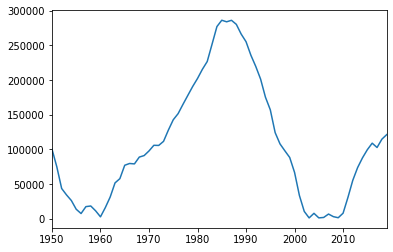

In [0]:
#Plotting random row
d.iloc[100].plot()

In [0]:
df = pd.concat([df,d], sort=False)

In [0]:
df

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Area,City,Country,If 2020> capacity,Latitude,Longitude,existing road/flyover capacity,existing road/flyover construction year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90000.0,Yelahanka,Bengaluru,India,Yes,12.97194,77.59369,80000.0,2015.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120000.0,Hebbala,Bengaluru,India,No,12.97194,77.59369,150000.0,2018.0
0,17837.0,13787.0,9330.0,38816.0,38780.0,47698.0,29463.0,31825.0,38626.0,28461.0,20224.0,17124.0,32190.0,38804.0,11106.0,66037.0,123733.0,160603.0,157994.0,142760.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,301833.0,359414.0,390816.0,347410.0,354993.0,308461.0,281350.0,231374.0,187100.0,113960.0,20097.0,152578.0,256431.0,335672.0,419113.0,427710.0,454462.0,514857.0,515442.0,510394.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40235.0,128925.0,225784.0,231592.0,144269.0,78111.0,846.0,68789.0,73796.0,15141.0,86976.0,137098.0,107946.0,133648.0,208689.0,241591.0,194813.0,151907.0,46693.0,55313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,294036.0,290001.0,301151.0,273888.0,256100.0,295592.0,318038.0,316093.0,318313.0,320637.0,329207.0,320229.0,245803.0,208867.0,106914.0,35072.0,72876.0,159768.0,237807.0,321077.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,33797.0,34759.0,36360.0,38856.0,40906.0,43035.0,43650.0,46466.0,47951.0,50191.0,51501.0,53614.0,53159.0,53837.0,54148.0,55447.0,55541.0,56235.0,56693.0,58672.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,17837.0,13787.0,9330.0,38816.0,38780.0,47698.0,29463.0,31825.0,38626.0,28461.0,20224.0,17124.0,32190.0,38804.0,11106.0,66037.0,123733.0,160603.0,157994.0,142760.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,301833.0,359414.0,390816.0,347410.0,354993.0,308461.0,281350.0,231374.0,187100.0,113960.0,20097.0,152578.0,256431.0,335672.0,419113.0,427710.0,454462.0,514857.0,515442.0,510394.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40235.0,128925.0,225784.0,231592.0,144269.0,78111.0,846.0,68789.0,73796.0,15141.0,86976.0,137098.0,107946.0,133648.0,208689.0,241591.0,194813.0,151907.0,46693.0,55313.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df.to_csv("SampleTrafficData.csv")

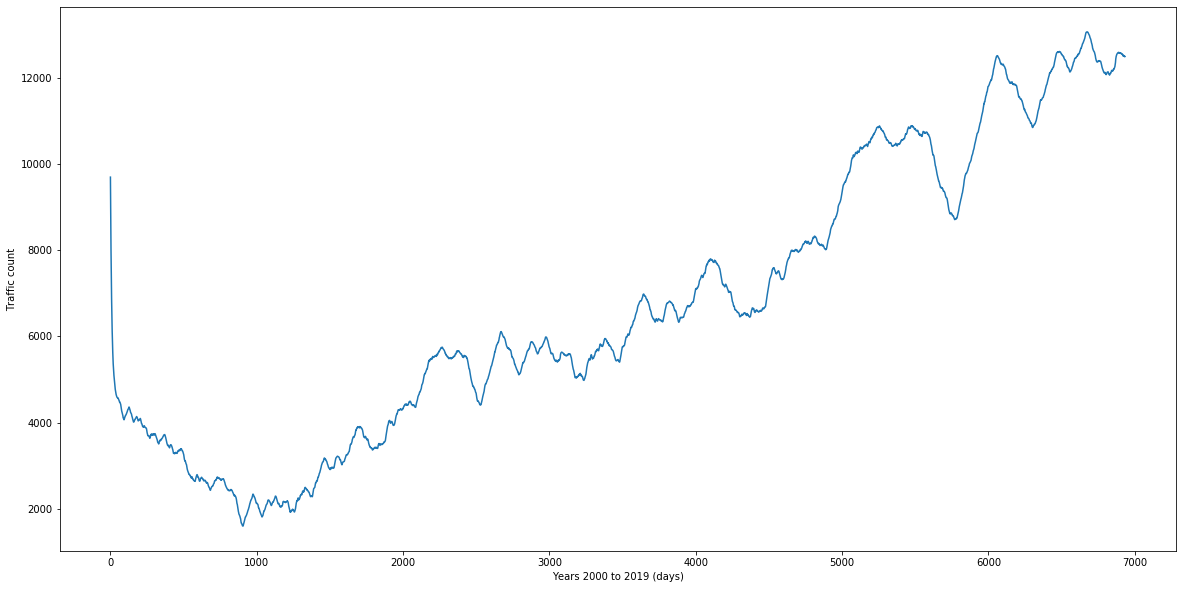

In [5]:
def createData(rows,startYear,endYear,plotGraph=True,printLog=True):

  points = 2560
  span = 5.0
  octaves = 20
  base = 5000
  slope = .9
  amplitude = 10000

  values = []
  n= 0


 
  span = np.random.random_sample()*10

  time = []
  value = []

  #years = [x for x in range((endYear-startYear)*365)]


  for i in range((endYear-startYear)*365):
    #for j in range(365):
    x = float(startYear+i) * span / points - 0.5 * span

    y = base + noise.pnoise1(x , octaves) * amplitude
    #print(x,y, end= '\n')
    
    time.append(n)
    n+=1
    #span*=1.2
    base*=slope
    y = y + (i*2*slope)
    value.append(int(y))


    #base*=slope
  plt.figure(figsize=(20,10))
  plt.plot(time,value)
  plt.xlabel("Years 2000 to 2019 (days)")
  plt.ylabel("Traffic count")

  minValue = min(value)
  value = np.array(value)+np.abs(minValue) + np.random.randint(50)

 

  return  np.array(value), np.array(time)



data ,time = createData(1000,startYear=2000,endYear=2019,plotGraph=True,printLog=True)


Text(0, 0.5, 'Traffic count')

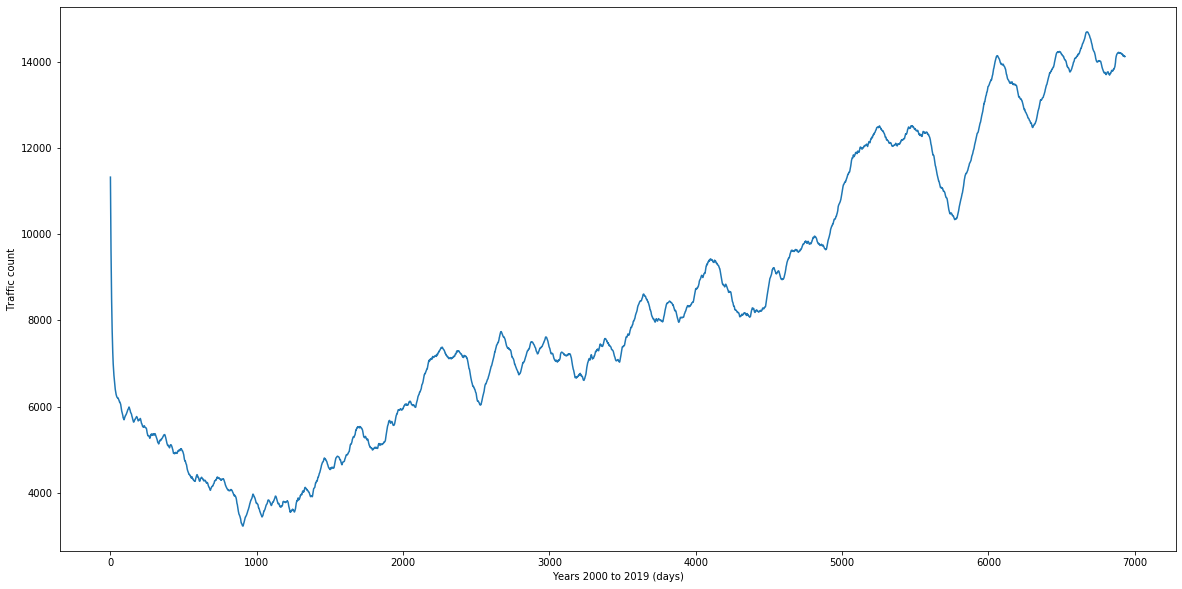

In [6]:
plt.figure(figsize=(20,10))
plt.plot(time,data)
plt.xlabel("Years 2000 to 2019 (days)")
plt.ylabel("Traffic count")

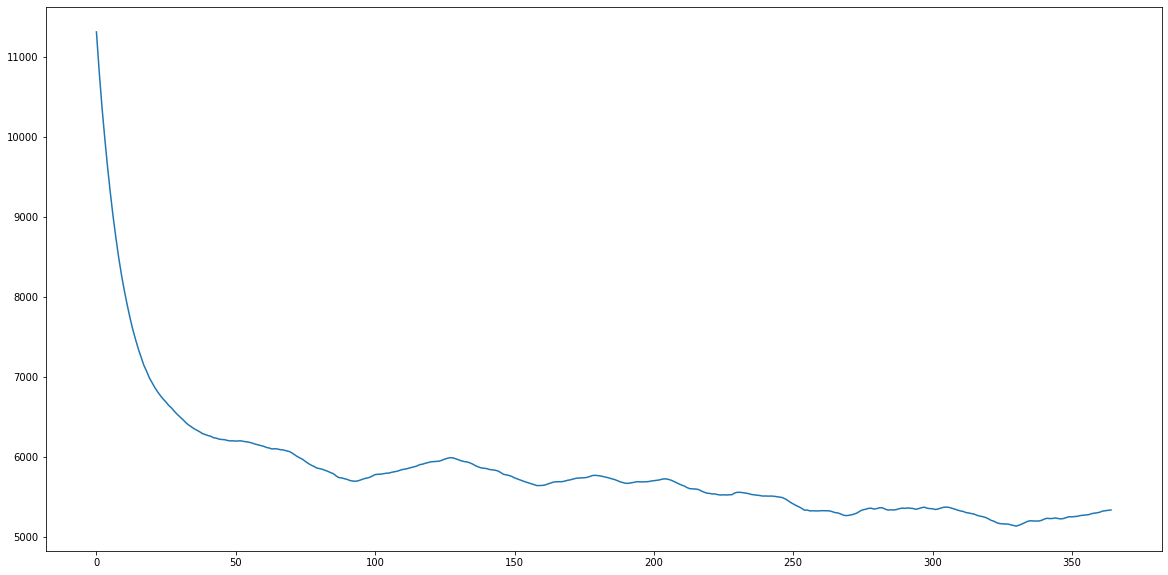

In [11]:
plt.figure(figsize=(20,10))
plt.plot(time[:365],data[:365])

In [7]:
min(data)

3227

In [8]:
max(data)

14688

Total Days =  7305


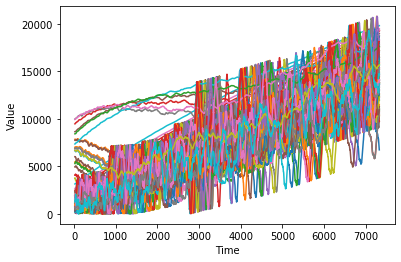

In [46]:
def isLeap(year):
  return ((year%4 ==0 and year%100 !=0) or (year%400 == 0))






def createData(rows,startYear,endYear,plotGraph=True,printLog=True):

  points = 2560
  span = 5.0
  octaves = 20
  base = 5000
  slope = .9
  amplitude = 10000

  values = []
  n= 0

  totalDays = 0
  startAdjust = 20

  for year in range(startYear,endYear+1):
    if isLeap(year):
      totalDays+=366
    else:
      totalDays+=365

  print("Total Days = ",totalDays)
  totalDays+=startAdjust

  


  while n != rows:
 
    span = np.random.random_sample()*10

    time = []
    value = []

    for i in range(totalDays):
      x = float(startYear+i) * span / points - 0.5 * span

      y = base + noise.pnoise1(x , octaves) * amplitude
      
      time.append(i)
      base*=slope
      y = y + (i*2*slope)
      value.append(int(y))


    minValue = min(value)
    value = np.array(value)+np.abs(minValue) + np.random.randint(50)
    value = np.array(value[startAdjust:])
    time = np.array(time[startAdjust:])

    n+=1

    if plotGraph:
      #plt.figure(figsize=(20,10))
      plot_series(time,value)
      #plt.xlabel("Years 2000 to 2019 (days)")
      #plt.ylabel("Traffic count")
    values.append(value)

    



 

  return  np.array(values), np.array(time)



data ,time = createData(100,startYear=2000,endYear=2019,plotGraph=True,printLog=True)


In [47]:
print(data.shape)
print(time.shape)

(100, 7305)
(7305,)


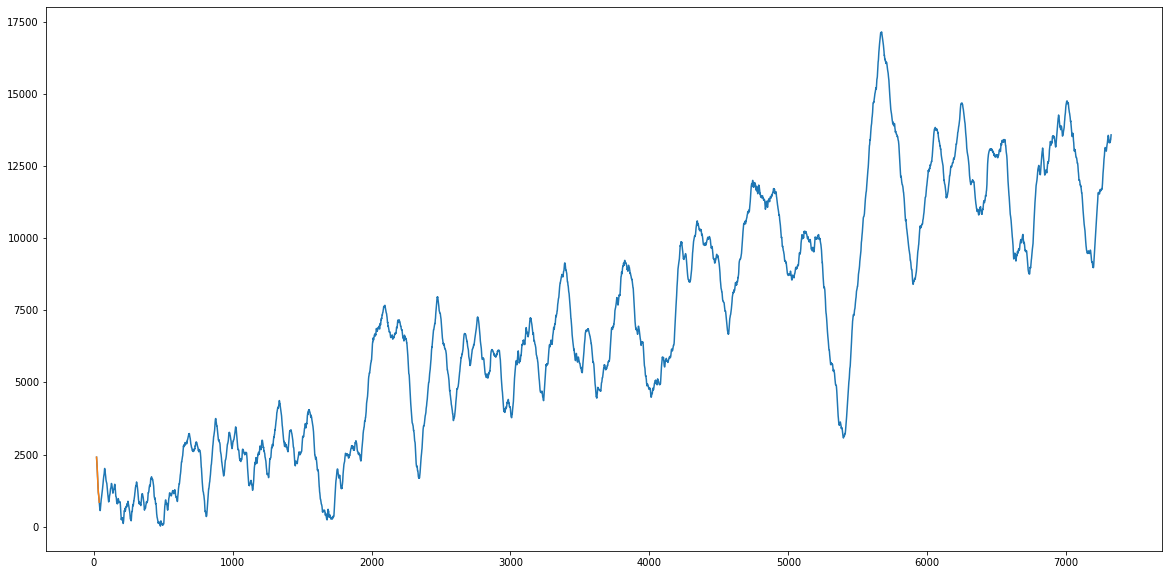

In [48]:
plt.figure(figsize=(20,10))
plt.plot(time,data[0])
plt.plot(time[:20],data[0][:20])

In [50]:
columns = []

for year in range(2000,2019+1):
  if isLeap(year):
    for day in range(1,367):
      clm = str(year) +'-'+ str(day)
      columns.append(clm)
  else:
    for day in range(1,366):
      clm = str(year) +'-'+ str(day)
      columns.append(clm)

print(columns)



['2000-1', '2000-2', '2000-3', '2000-4', '2000-5', '2000-6', '2000-7', '2000-8', '2000-9', '2000-10', '2000-11', '2000-12', '2000-13', '2000-14', '2000-15', '2000-16', '2000-17', '2000-18', '2000-19', '2000-20', '2000-21', '2000-22', '2000-23', '2000-24', '2000-25', '2000-26', '2000-27', '2000-28', '2000-29', '2000-30', '2000-31', '2000-32', '2000-33', '2000-34', '2000-35', '2000-36', '2000-37', '2000-38', '2000-39', '2000-40', '2000-41', '2000-42', '2000-43', '2000-44', '2000-45', '2000-46', '2000-47', '2000-48', '2000-49', '2000-50', '2000-51', '2000-52', '2000-53', '2000-54', '2000-55', '2000-56', '2000-57', '2000-58', '2000-59', '2000-60', '2000-61', '2000-62', '2000-63', '2000-64', '2000-65', '2000-66', '2000-67', '2000-68', '2000-69', '2000-70', '2000-71', '2000-72', '2000-73', '2000-74', '2000-75', '2000-76', '2000-77', '2000-78', '2000-79', '2000-80', '2000-81', '2000-82', '2000-83', '2000-84', '2000-85', '2000-86', '2000-87', '2000-88', '2000-89', '2000-90', '2000-91', '2000-9

In [51]:
len(columns)

7305

In [68]:
df = pd.DataFrame(data,columns=columns)
df.head()

,2000-1,2000-2,2000-3,2000-4,2000-5,2000-6,2000-7,2000-8,2000-9,2000-10,2000-11,2000-12,2000-13,2000-14,2000-15,2000-16,2000-17,2000-18,2000-19,2000-20,2000-21,2000-22,2000-23,2000-24,2000-25,2000-26,2000-27,2000-28,2000-29,2000-30,2000-31,2000-32,2000-33,2000-34,2000-35,2000-36,2000-37,2000-38,2000-39,2000-40,...,2019-326,2019-327,2019-328,2019-329,2019-330,2019-331,2019-332,2019-333,2019-334,2019-335,2019-336,2019-337,2019-338,2019-339,2019-340,2019-341,2019-342,2019-343,2019-344,2019-345,2019-346,2019-347,2019-348,2019-349,2019-350,2019-351,2019-352,2019-353,2019-354,2019-355,2019-356,2019-357,2019-358,2019-359,2019-360,2019-361,2019-362,2019-363,2019-364,2019-365
0,2406,2328,2269,2187,2107,2005,1877,1749,1679,1546,1445,1345,1265,1177,1142,1100,1052,988,933,847,745,687,677,635,590,561,555,580,640,703,746,797,879,950,962,981,1019,1051,1091,1123,...,13116,13112,13060,13055,13022,13042,13091,13155,13201,13217,13244,13270,13304,13355,13394,13435,13479,13553,13571,13567,13545,13512,13460,13409,13394,13337,13314,13340,13365,13378,13338,13319,13322,13336,13379,13423,13424,13477,13546,13588
1,5469,5452,5423,5405,5401,5388,5375,5365,5363,5366,5379,5393,5403,5413,5433,5447,5446,5451,5459,5462,5472,5479,5486,5499,5512,5514,5526,5533,5546,5560,5574,5582,5590,5602,5603,5608,5613,5625,5639,5650,...,15685,15690,15702,15729,15739,15744,15762,15780,15785,15790,15797,15802,15807,15810,15818,15842,15861,15886,15905,15927,15939,15945,15949,15958,15965,15967,15967,15967,15967,15964,15964,15953,15941,15939,15938,15925,15906,15893,15876,15870
2,2244,2275,2273,2272,2255,2209,2182,2215,2183,2130,2086,2055,1979,1887,1738,1607,1562,1523,1518,1528,1460,1390,1337,1323,1307,1169,1056,961,893,856,819,765,753,680,654,661,661,672,679,677,...,9261,9206,9134,9105,9154,9196,9171,9166,9090,9069,9053,9044,9080,9155,9209,9235,9282,9324,9426,9531,9576,9575,9632,9727,9824,9889,10015,10097,10202,10283,10387,10463,10545,10556,10654,10720,10787,10870,10957,11072
3,1899,1891,1849,1835,1841,1844,1826,1824,1817,1822,1844,1839,1845,1861,1876,1909,1943,1927,1934,1921,1906,1874,1854,1831,1814,1773,1760,1731,1761,1755,1738,1733,1702,1678,1631,1549,1449,1406,1316,1238,...,14192,14191,14217,14259,14285,14359,14451,14494,14524,14582,14655,14714,14726,14766,14808,14907,14959,15022,15055,15101,15124,15132,15176,15205,15212,15220,15224,15204,15142,15110,15125,15145,15172,15144,15121,15136,15126,15043,14994,14954
4,1239,1226,1235,1292,1404,1537,1614,1643,1717,1781,1788,1772,1751,1771,1749,1746,1682,1696,1728,1742,1790,1817,1841,1855,1821,1824,1798,1766,1750,1794,1859,1867,1864,1835,1740,1675,1659,1613,1624,1579,...,17710,17781,17867,17976,18063,18179,18266,18395,18446,18506,18501,18558,18644,18649,18646,18619,18638,18638,18639,18644,18610,18592,18552,18462,18442,18396,18343,18355,18338,18320,18293,18261,18279,18298,18285,18209,18118,18088,18044,18027


In [69]:
df.describe()

,2000-1,2000-2,2000-3,2000-4,2000-5,2000-6,2000-7,2000-8,2000-9,2000-10,2000-11,2000-12,2000-13,2000-14,2000-15,2000-16,2000-17,2000-18,2000-19,2000-20,2000-21,2000-22,2000-23,2000-24,2000-25,2000-26,2000-27,2000-28,2000-29,2000-30,2000-31,2000-32,2000-33,2000-34,2000-35,2000-36,2000-37,2000-38,2000-39,2000-40,...,2019-326,2019-327,2019-328,2019-329,2019-330,2019-331,2019-332,2019-333,2019-334,2019-335,2019-336,2019-337,2019-338,2019-339,2019-340,2019-341,2019-342,2019-343,2019-344,2019-345,2019-346,2019-347,2019-348,2019-349,2019-350,2019-351,2019-352,2019-353,2019-354,2019-355,2019-356,2019-357,2019-358,2019-359,2019-360,2019-361,2019-362,2019-363,2019-364,2019-365
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.0000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2535.310000,2537.150000,2533.350000,2534.16000,2536.610000,2534.600000,2529.920000,2527.740000,2521.850000,2519.250000,2515.520000,2510.590000,2507.02000,2500.720000,2494.320000,2492.870000,2488.050000,2482.460000,2476.900000,2469.280000,2465.130000,2463.000000,2463.080000,2461.37000,2462.320000,2462.820000,2460.160000,2457.190000,2459.170000,2462.470000,2462.380000,2461.760000,2460.150000,2457.97000,2459.540000,2462.390000,2465.2800,2468.280000,2470.520000,2474.520000,...,14546.740000,14544.180000,14543.99000,14545.630000,14546.880000,14545.820000,14548.360000,14547.080000,14539.190000,14536.380000,14533.260000,14532.360000,14531.340000,14529.09000,14525.820000,14525.760000,14527.860000,14532.080000,14532.140000,14535.640000,14537.520000,14536.440000,14532.450000,14536.490000,14536.450000,14533.770000,14531.380000,14532.960000,14532.190000,14531.130000,14532.010000,14529.040000,14528.240000,14529.170000,14527.990000,14529.550000,14531.790000,14533.660000,14537.350000,14540.600000
std,2440.359883,2439.593973,2440.571027,2439.95023,2439.019255,2440.842598,2444.632263,2445.952974,2449.654378,2451.881996,2453.867866,2455.763985,2457.17841,2461.284686,2465.023101,2465.811517,2467.672904,2469.735096,2471.852213,2475.456293,2476.891354,2477.761853,2478.182246,2480.12748,2480.847313,2480.828069,2482.405333,2484.110363,2483.618764,2484.958445,2487.777568,2491.071086,2494.360331,2498.97327,2500.630132,2502.250901,2504.3179,2505.167057,2506.420976,2507.518768,...,2861.357941,2857.194044,2856.35278,2856.025768,2854.633382,2848.863812,2845.717735,2841.569109,2841.343205,2842.037709,2841.026801,2837.399362,2833.150255,2827.43802,2822.760342,2823.542406,2817.921223,2808.893426,2804.136425,2799.961881,2793.130391,2786.856842,2783.801138,2776.624466,2771.900899,2768.654576,2764.084899,2762.127722,2763.213346,2759.246591,2752.322599,2748.849302,2745.993357,2743.836351,2739.558902,2732.803978,2725.007572,2722.071371,2718.702804,2714.403791
min,202.000000,240.000000,236.000000,247.00000,230.000000,208.000000,158.000000,133.000000,124.000000,103.000000,76.000000,63.000000,58.00000,76.000000,107.000000,135.000000,159.000000,180.000000,227.000000,222.000000,199.000000,178.000000,159.000000,131.00000,141.000000,149.000000,171.000000,207.000000,233.000000,259.000000,239.000000,196.000000,156.000000,120.00000,79.000000,67.000000,54.0000,67.000000,76.000000,85.000000,...,8396.000000,8357.000000,8304.00000,8256.000000,82

In [70]:
df[["2000-1","2019-365"]]

,2000-1,2019-365
0,2406,13588
1,5469,15870
2,2244,11072
3,1899,14954
4,1239,18027
...,...,...
95,318,10969
96,2101,14126
97,678,13151
98,6695,15702


In [0]:
df.to_csv("Traffic_density_day_by_day_2000_to_2019.csv",index=False)

In [84]:
print(data.shape)
print(data.T.shape)


(100, 7305)
(7305, 100)


In [85]:
df2 = pd.DataFrame(data.T)
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,2406,5469,2244,1899,1239,355,1467,1639,2311,1486,2253,1735,648,937,1432,4944,6664,1144,1010,3154,2029,1971,5299,4072,400,2299,2690,2212,3795,6651,782,7860,1424,2498,318,710,1858,1596,1253,593,...,895,7019,1460,1689,1456,7751,2027,6888,1140,7363,644,1773,1084,1998,1280,6027,477,916,2090,1834,1564,2081,1545,1911,678,805,9955,816,1603,202,265,838,8432,1801,743,318,2101,678,6695,1288
1,2328,5452,2275,1891,1226,336,1447,1685,2269,1516,2222,1749,642,936,1453,4938,6663,1131,982,3157,2029,2021,5308,4083,357,2302,2693,2240,3807,6648,811,7850,1556,2501,311,710,1867,1579,1201,635,...,813,7018,1404,1778,1470,7750,2015,6886,1126,7367,604,1716,1081,2006,1341,6024,515,912,2079,1857,1590,2052,1579,1907,660,736,9957,791,1587,240,253,897,8433,1823,746,331,2053,692,6693,1342
2,2269,5423,2273,1849,1235,312,1430,1672,2242,1549,2168,1799,619,915,1466,4938,6663,1134,954,3160,2019,2054,5323,4103,339,2305,2695,2281,3802,6639,832,7839,1631,2503,307,724,1828,1555,1144,656,...,742,7013,1307,1797,1477,7748,2013,6880,1083,7372,575,1722,1088,1986,1347,6021,542,889,2075,1786,1618,2010,1618,1854,755,648,9954,701,1582,241,236,901,8432,1851,758,390,1976,696,6688,1379
3,2187,5405,2272,1835,1292,281,1401,1624,2266,1580,2123,1846,588,902,1516,4941,6666,1134,953,3163,2028,2108,5336,4128,344,2308,2697,2291,3787,6640,809,7831,1659,2506,320,847,1843,1484,1095,679,...,692,7006,1220,1775,1512,7744,2005,6875,1047,7378,536,1746,1087,2035,1402,6020,541,879,2064,1794,1624,1972,1659,1882,835,571,9958,709,1581,247,247,892,8431,1861,741,469,1829,686,6679,1430
4,2107,5401,2255,1841,1404,254,1372,1565,2241,1642,2092,1859,544,888,1587,4955,6670,1126,1012,3166,2041,2203,5346,4141,338,2311,2700,2318,3774,6628,846,7820,1732,2509,313,993,1832,1392,1055,691,...,699,7007,1139,1759,1542,7744,1972,6875,1041,7385,537,1755,1099,2025,1468,6025,533,863,2063,1801,1620,1943,1643,1805,812,560,9963,718,1571,269,230,969,8429,1810,764,535,1678,680,6677,1472


In [0]:
df2.index = columns

In [87]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
2000-1,2406,5469,2244,1899,1239,355,1467,1639,2311,1486,2253,1735,648,937,1432,4944,6664,1144,1010,3154,2029,1971,5299,4072,400,2299,2690,2212,3795,6651,782,7860,1424,2498,318,710,1858,1596,1253,593,...,895,7019,1460,1689,1456,7751,2027,6888,1140,7363,644,1773,1084,1998,1280,6027,477,916,2090,1834,1564,2081,1545,1911,678,805,9955,816,1603,202,265,838,8432,1801,743,318,2101,678,6695,1288
2000-2,2328,5452,2275,1891,1226,336,1447,1685,2269,1516,2222,1749,642,936,1453,4938,6663,1131,982,3157,2029,2021,5308,4083,357,2302,2693,2240,3807,6648,811,7850,1556,2501,311,710,1867,1579,1201,635,...,813,7018,1404,1778,1470,7750,2015,6886,1126,7367,604,1716,1081,2006,1341,6024,515,912,2079,1857,1590,2052,1579,1907,660,736,9957,791,1587,240,253,897,8433,1823,746,331,2053,692,6693,1342
2000-3,2269,5423,2273,1849,1235,312,1430,1672,2242,1549,2168,1799,619,915,1466,4938,6663,1134,954,3160,2019,2054,5323,4103,339,2305,2695,2281,3802,6639,832,7839,1631,2503,307,724,1828,1555,1144,656,...,742,7013,1307,1797,1477,7748,2013,6880,1083,7372,575,1722,1088,1986,1347,6021,542,889,2075,1786,1618,2010,1618,1854,755,648,9954,701,1582,241,236,901,8432,1851,758,390,1976,696,6688,1379
2000-4,2187,5405,2272,1835,1292,281,1401,1624,2266,1580,2123,1846,588,902,1516,4941,6666,1134,953,3163,2028,2108,5336,4128,344,2308,2697,2291,3787,6640,809,7831,1659,2506,320,847,1843,1484,1095,679,...,692,7006,1220,1775,1512,7744,2005,6875,1047,7378,536,1746,1087,2035,1402,6020,541,879,2064,1794,1624,1972,1659,1882,835,571,9958,709,1581,247,247,892,8431,1861,741,469,1829,686,6679,1430
2000-5,2107,5401,2255,1841,1404,254,1372,1565,2241,1642,2092,1859,544,888,1587,4955,6670,1126,1012,3166,2041,2203,5346,4141,338,2311,2700,2318,3774,6628,846,7820,1732,2509,313,993,1832,1392,1055,691,...,699,7007,1139,1759,1542,7744,1972,6875,1041,7385,537,1755,1099,2025,1468,6025,533,863,2063,1801,1620,1943,1643,1805,812,560,9963,718,1571,269,230,969,8429,1810,764,535,1678,680,6677,1472


In [90]:
df2.columns

RangeIndex(start=0, stop=100, step=1)

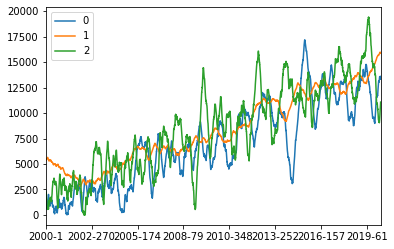

In [92]:
df2[[0,1,2]].plot()

In [93]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7305 entries, 2000-1 to 2019-365
Data columns (total 100 columns):
0     7305 non-null int64
1     7305 non-null int64
2     7305 non-null int64
3     7305 non-null int64
4     7305 non-null int64
5     7305 non-null int64
6     7305 non-null int64
7     7305 non-null int64
8     7305 non-null int64
9     7305 non-null int64
10    7305 non-null int64
11    7305 non-null int64
12    7305 non-null int64
13    7305 non-null int64
14    7305 non-null int64
15    7305 non-null int64
16    7305 non-null int64
17    7305 non-null int64
18    7305 non-null int64
19    7305 non-null int64
20    7305 non-null int64
21    7305 non-null int64
22    7305 non-null int64
23    7305 non-null int64
24    7305 non-null int64
25    7305 non-null int64
26    7305 non-null int64
27    7305 non-null int64
28    7305 non-null int64
29    7305 non-null int64
30    7305 non-null int64
31    7305 non-null int64
32    7305 non-null int64
33    7305 non-null int64
34  

In [0]:
df2.to_csv("Traffic_density_day_by_day_2000_to_2019_version2.csv")

In [96]:
df2.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
count,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,...,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000,7305.000000
mean,7024.407803,8356.523066,8377.577139,7004.496646,8693.593703,6654.172758,6795.168652,7623.848323,8419.073648,7583.900753,8405.736345,8739.584531,6697.943600,6475.769884,7417.868857,8034.782478,9003.830253,6760.577550,6896.568925,12267.568104,6960.131691,8440.379329,8312.316769,7439.795209,6762.961670,11124.617112,11699.487201,8410.864750,7261.364819,8996.081177,6637.981656,9895.392882,8720.420534,11438.162081,6684.217796,8608.287885,7032.171937,7285.462149,7291.729637,6750.083778,...,7959.085147,9309.595893,7052.518275,8708.115400,7590.315948,9858.501300,6982.338535,9217.749350,6893.093361,13694.773169,7195.304312,8724.726489,6720.711704,6970.717864,8069.373580,8505.799452,6762.992882,6451.563587,7078.522793,8774.866667,6898.003285,6979.249555,7595.078713,8788.155373,8650.997125,7787.203970,13301.253388,8625.969884,6824.264613,6701.489391,6601.077344,7826.057221,13287.090897,8734.385900,8580.079398,6649.883778,8403.725804,6842.888022,9010.730459,7296.409446
std,4126.996680,3449.312252,4306.799146,4215.949672,4355.663684,3971.501729,3954.793734,4440.220184,4286.639152,4445.889517,4276.588901,4329.964873,3931.788103,3883.022951,4368.258414,3479.194786,3364.790749,3972.408931,4283.127935,4756.540641,4194.944004,4350.173214,3476.053413,3259.402024,3852.037287,4767.722206,4791.559396,4317.808244,3501.057619,3385.278337,3989.673358,3003.506635,4364.463024,4789.348773,4248.089839,4343.564693,4220.705478,4301.294984,4272.475312,4027.814555,...,4259.212595,3251.316601,4154.839335,4347.117228,4448.656104,3059.009923,3958.862263,3282.873936,4299.623262,2497.319623,4361.355285,4323.977595,3965.666326,4223.084666,4308.579495,3397.805288,4084.363035,3882.732398,3979.956270,4356.987901,4023.805928,4200.805135,4443.481727,4357.689279,4425.253082,4384.171354,2709.291177,4415.096983,3957.094499,3897.053499,4206.793841,4312.951992,1929.346670,4347.844085,4419.146293,4216.197439,4266.769422,4088.283505,3354.026168,4374.566871
min,17.000000,2780.000000,4.000000,9.000000,28.000000,47.000000,290.000000,40.000000,42.000000,19.000000,30.000000,25.000000,22.000000,102.000000,8.000000,2313.000000,3749.000000,220.000000,20.000000,3154.000000,37.000000,45.000000,2702.000000,1737.000000,30.000000,2299.000000,2690.000000,37.000000,1377.000000,3716.000000,188.000000,5233.000000,31.000000,2498.000000,25.000000,14.000000,20.000000,21.000000,27.000000,454.000000,...,47.000000,4252.000000,11.000000,20.000000,37.000000,5139.000000,642.000000,4111.000000,33.000000,7363.000000,16.000000,24.000000,177.000000,48.000000,38.000000,3029.000000,274.000000,78.000000,757.000000,20.000000,406.000000,8.000000,20.000000,41.000000,46.000000,41.000000,9954.000000,19.000000,348.000000,0.000000,8.000000,34.000000,8429.000000,5.000000,18.000000,2.000000,14.000000,415.000000,3771.000000,49.000000